In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_dir = "./LAB DATA/"
save_dir = "./latex/"

In [4]:
step10_file = data_dir + "RFC_Step10.csv"
step15_file = data_dir + "RFCS142_Step15.csv"
step17_file = data_dir + "RFCS142_Step17.csv"
step18_file = data_dir + "RFCS142_Step18.csv"

In [5]:
f_10, P_10 = np.loadtxt(step10_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)
f_15, P_15 = np.loadtxt(step15_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)
f_17, P_17 = np.loadtxt(step17_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)
f_18, P_18 = np.loadtxt(step18_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)

In [7]:
f_10 /=1e6

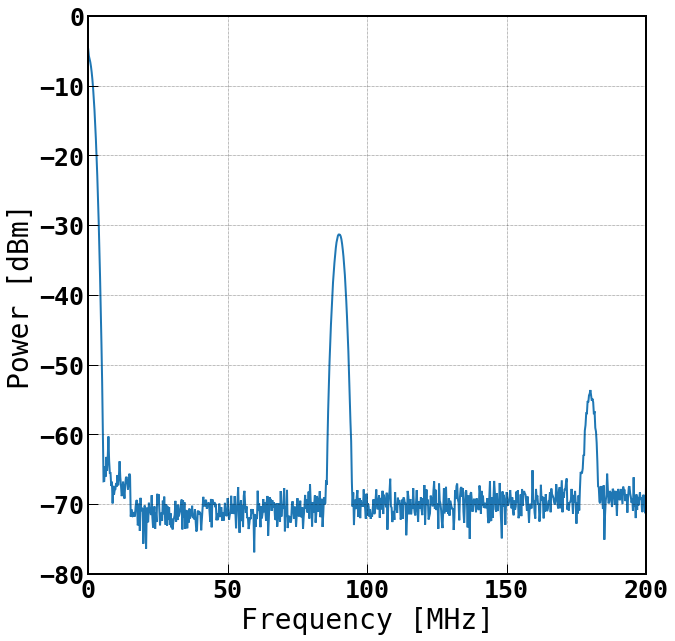

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_10, P_10)
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis([0, 200, -80, 0])
ax.grid(which='both');

In [11]:
# Find the peak IF power
mask = np.logical_and(f_10 > 50, P_10 > -35)
P_10[mask]

array([-34.29181337, -33.28039652, -32.48959382, -32.02793013,
       -31.5380635 , -31.36365843, -31.35515291, -31.4012446 ,
       -31.61172673, -32.02984719, -32.69597868, -33.54682047, -34.5456034 ])

In [22]:
# Do a curve fit to the few points within the mask as a quadratic approximation
# Model is X = [a, b, c] such that P_10[mask] = a * f_10[mask]^2 + b * f_10[mask] + c
A = np.vstack([f_10[mask]**2, f_10[mask], np.ones_like(f_10[mask])]).T
X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, P_10[mask]))

quadratic = lambda f: X[0] * f**2 + X[1] * f + X[2]
f = np.linspace(np.min(f_10[mask]), np.max(f_10[mask]), 100)
P = quadratic(f)
print (np.max(P))

-31.2630841854


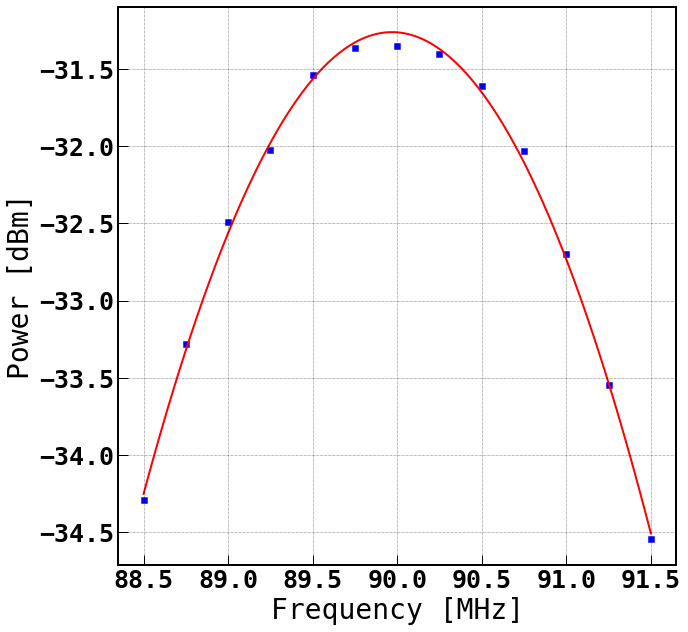

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_10[mask], P_10[mask], 'bs')
ax.plot(f, P, 'r')
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis('tight')
ax.grid(which='both');

In [45]:
IF_power = np.array([-29.62,-30.92,-33.83,-36.93,-39.05,-40.72,-42.46,-45.69][::-1] +\
                    [-31.58, -32.45,-32.72,-32.26, -31.3,-29.85,-28.74,-28.72,-29.44, \
                     -30.42,-31.1,-31.45,-31.19,-30.34,-29.42,-28.98,-29.9,-29.5,-30.2,-30.9])
RF_freq = np.array([5.88 - _*0.01 for _ in range(8)][::-1] + [5.9 + _*0.01 for _ in range(20)]) 

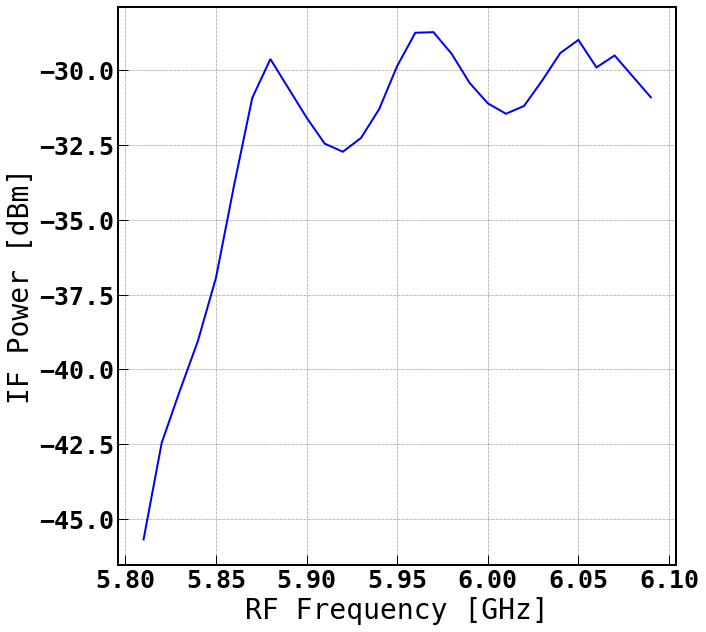

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(RF_freq, IF_power, 'b')
ax.set_xlabel(r'RF Frequency [GHz]')
ax.set_ylabel(r'IF Power [dBm]')
ax.axis('tight')
ax.grid(which='both');

In [47]:
LO_P = np.arange(-5, 8 ,1)
IF_P = np.array([-50.67,-40.64,-37.04,-34.82,-33.33,-32.44,-31.94,-31.65,-31.52,-31.64,-31.92,-32.65,-34])

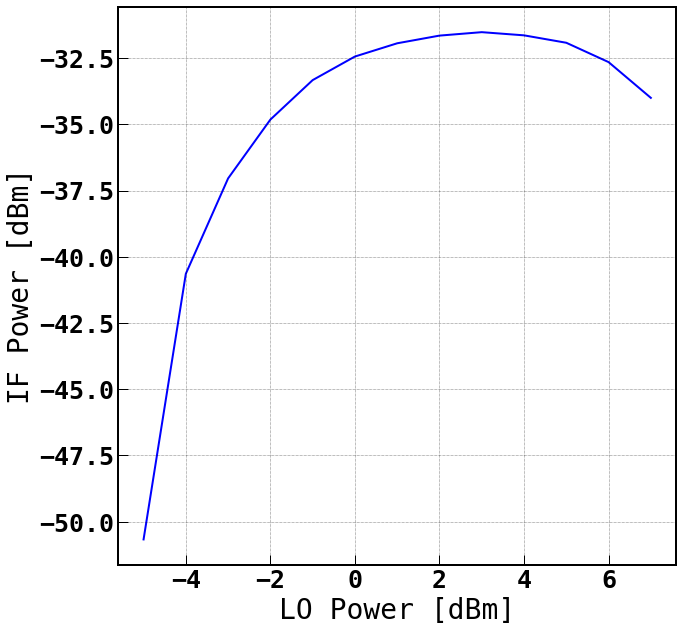

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(LO_P, IF_P, 'b')
ax.set_xlabel(r'LO Power [dBm]')
ax.set_ylabel(r'IF Power [dBm]')
ax.axis('tight')
ax.grid(which='both');

In [57]:
LO_P[np.where(IF_P == np.max(IF_P))[0]] # The LO power at which the IF power is maximized

array([3])